# DA Projet 4 - Realisez une etude de sante publique avec R ou Python

In [1]:
#Import des librairies necessaires a la completion du projet
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Initialisation de la palette de couleurs pour les graphiques
sns.set_palette("hls", 8)

## Etape 1 - Import des donnees & verification du typage des colonnes

In [2]:
#Import des fichiers
aide_alim = pd.read_csv('aide_alimentaire_new.csv', encoding='latin-1')
DA2013 = pd.read_csv('dispo_alimentaire_2013_new.csv', encoding='latin-1')
DA2014 = pd.read_csv('dispo_alimentaire_2014_new.csv', encoding='latin-1')
DA2015 = pd.read_csv('dispo_alimentaire_2015_new.csv', encoding='latin-1')
DA2016 = pd.read_csv('dispo_alimentaire_2016_new.csv', encoding='latin-1')
DA2017 = pd.read_csv('dispo_alimentaire_2017_new.csv', encoding='latin-1')
dispo_alim = pd.concat([DA2013, DA2014, DA2015, DA2016, DA2017], ignore_index = True)
pop_tot = pd.read_csv('population_new.csv', encoding='latin-1')
sous_nut = pd.read_csv('sous_nutrition_new.csv', encoding='latin-1')

In [3]:
#Verification des noms et du typage des colonnes et du nombre de lignes importees
aide_alim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [4]:
#Verification des noms et du typage des colonnes et du nombre de lignes importees
aide_alim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [5]:
#Verification des noms et du typage des colonnes et du nombre de lignes importees
dispo_alim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152892 entries, 0 to 1152891
Data columns (total 5 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   Zone     1152891 non-null  object 
 1   Produit  1152891 non-null  object 
 2   Élément  1152891 non-null  object 
 3   Année    1152891 non-null  float64
 4   Valeur   1152891 non-null  float64
dtypes: float64(2), object(3)
memory usage: 44.0+ MB


In [6]:
#Verification des noms et du typage des colonnes et du nombre de lignes importees
pop_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [7]:
#Verification des noms et du typage des colonnes et du nombre de lignes importees
sous_nut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [8]:
#Uniformisation du nom des colonnes
aide_alim.rename(columns={'Pays bénéficiaire': 'Pays', 'Année': 'Annee'}, inplace=True)
dispo_alim.rename(columns={'Zone': 'Pays', 'Élément': 'Element', 'Année': 'Annee'}, inplace=True)
pop_tot.rename(columns={'Zone': 'Pays', 'Année': 'Annee','Valeur': 'Habitants'}, inplace=True)
sous_nut.rename(columns={'Zone': 'Pays', 'Année':'Annee','Valeur': 'Habitants'}, inplace=True)

#Changement des data type pour certaines colonnes
aide_alim['Valeur'] = aide_alim['Valeur'].astype('float')
pop_tot['Pays'] = pop_tot['Pays'].astype('category')
pop_tot['Annee'] = pop_tot['Annee'].astype('int')


## Etape 2 - Etude de la qualite des donnees

In [9]:
#verification de l'unicite des noms des pays dans le fichier de disponibilite alimentaire
dispo_alim['Pays'].unique().tolist()

['Afghanistan',
 'Afrique du Sud',
 'Albanie',
 'Algérie',
 'Allemagne',
 'Angola',
 'Antigua-et-Barbuda',
 'Arabie saoudite',
 'Argentine',
 'Arménie',
 'Australie',
 'Autriche',
 'Azerbaïdjan',
 'Bahamas',
 'Bahreïn',
 'Bangladesh',
 'Barbade',
 'Bélarus',
 'Belgique',
 'Belize',
 'Bénin',
 'Bhoutan',
 'Bolivie (État plurinational de)',
 'Bosnie-Herzégovine',
 'Botswana',
 'Brésil',
 'Bulgarie',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodge',
 'Cameroun',
 'Canada',
 'Chili',
 'Chine',
 'Chine - RAS de Hong-Kong',
 'Chine - RAS de Macao',
 'Chine, continentale',
 'Chine, Taiwan Province de',
 'Chypre',
 'Colombie',
 'Comores',
 'Congo',
 'Costa Rica',
 "Côte d'Ivoire",
 'Croatie',
 'Cuba',
 'Danemark',
 'Djibouti',
 'Dominique',
 'Égypte',
 'El Salvador',
 'Émirats arabes unis',
 'Équateur',
 'Espagne',
 'Estonie',
 'Eswatini',
 "États-Unis d'Amérique",
 'Éthiopie',
 'Fédération de Russie',
 'Fidji',
 'Finlande',
 'France',
 'Gabon',
 'Gambie',
 'Géorgie',
 'Ghana',
 'Grèce'

In [10]:
#verification de l'unicite des noms des pays dans le fichier de sous-nutrition
sous_nut['Pays'].unique().tolist()

['Afghanistan',
 'Afrique du Sud',
 'Albanie',
 'Algérie',
 'Allemagne',
 'Andorre',
 'Angola',
 'Antigua-et-Barbuda',
 'Arabie saoudite',
 'Argentine',
 'Arménie',
 'Australie',
 'Autriche',
 'Azerbaïdjan',
 'Bahamas',
 'Bahreïn',
 'Bangladesh',
 'Barbade',
 'Bélarus',
 'Belgique',
 'Belize',
 'Bénin',
 'Bermudes',
 'Bhoutan',
 'Bolivie (État plurinational de)',
 'Bosnie-Herzégovine',
 'Botswana',
 'Brésil',
 'Brunéi Darussalam',
 'Bulgarie',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodge',
 'Cameroun',
 'Canada',
 'Chili',
 'Chine - RAS de Hong-Kong',
 'Chine - RAS de Macao',
 'Chine, continentale',
 'Chine, Taiwan Province de',
 'Chypre',
 'Colombie',
 'Comores',
 'Congo',
 'Costa Rica',
 "Côte d'Ivoire",
 'Croatie',
 'Cuba',
 'Danemark',
 'Djibouti',
 'Dominique',
 'Égypte',
 'El Salvador',
 'Émirats arabes unis',
 'Équateur',
 'Érythrée',
 'Espagne',
 'Estonie',
 'Eswatini',
 "États-Unis d'Amérique",
 'Éthiopie',
 'Fédération de Russie',
 'Fidji',
 'Finlande',
 'France',
 

In [11]:
#verification de l'unicite des noms des pays dans le fichier de population
pop_tot['Pays'].unique().tolist()

['Afghanistan',
 'Afrique du Sud',
 'Albanie',
 'Algérie',
 'Allemagne',
 'Andorre',
 'Angola',
 'Anguilla',
 'Antigua-et-Barbuda',
 'Antilles néerlandaises (ex)',
 'Arabie saoudite',
 'Argentine',
 'Arménie',
 'Aruba',
 'Australie',
 'Autriche',
 'Azerbaïdjan',
 'Bahamas',
 'Bahreïn',
 'Bangladesh',
 'Barbade',
 'Bélarus',
 'Belgique',
 'Belize',
 'Bénin',
 'Bermudes',
 'Bhoutan',
 'Bolivie (État plurinational de)',
 'Bonaire, Saint-Eustache et Saba',
 'Bosnie-Herzégovine',
 'Botswana',
 'Brésil',
 'Brunéi Darussalam',
 'Bulgarie',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodge',
 'Cameroun',
 'Canada',
 'Chili',
 'Chine - RAS de Hong-Kong',
 'Chine - RAS de Macao',
 'Chine, continentale',
 'Chine, Taiwan Province de',
 'Chypre',
 'Colombie',
 'Comores',
 'Congo',
 'Costa Rica',
 "Côte d'Ivoire",
 'Croatie',
 'Cuba',
 'Curaçao',
 'Danemark',
 'Djibouti',
 'Dominique',
 'Égypte',
 'El Salvador',
 'Émirats arabes unis',
 'Équateur',
 'Érythrée',
 'Espagne',
 'Estonie',
 'Eswatin

In [12]:
#verification de l'unicite des noms des pays dans le fichier d'aide alimentaire
aide_alim['Pays'].unique().tolist()

['Afghanistan',
 'Algérie',
 'Angola',
 'Bangladesh',
 'Bénin',
 'Bhoutan',
 'Bolivie (État plurinational de)',
 'Burkina Faso',
 'Burundi',
 'Cambodge',
 'Cameroun',
 'Chine, continentale',
 'Colombie',
 'Comores',
 'Congo',
 "Côte d'Ivoire",
 'Cuba',
 'Djibouti',
 'Égypte',
 'El Salvador',
 'Équateur',
 'Éthiopie',
 'Gambie',
 'Géorgie',
 'Ghana',
 'Guatemala',
 'Guinée',
 'Guinée-Bissau',
 'Haïti',
 'Honduras',
 "Iran (République islamique d')",
 'Iraq',
 'Jordanie',
 'Kenya',
 'Kirghizistan',
 'Lesotho',
 'Liban',
 'Libéria',
 'Libye',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritanie',
 'Mozambique',
 'Myanmar',
 'Népal',
 'Nicaragua',
 'Niger',
 'Ouganda',
 'Pakistan',
 'Palestine',
 'Philippines',
 'République arabe syrienne',
 'République centrafricaine',
 'République démocratique du Congo',
 'République démocratique populaire lao',
 'République dominicaine',
 'République populaire démocratique de Corée',
 'République-Unie de Tanzanie',
 'Rwanda',
 'Sao Tomé-et-Principe',
 'Sénég

In [13]:
#Suppression des doublons
aide_alim.drop_duplicates(inplace=True)
dispo_alim.drop_duplicates(inplace=True)
pop_tot.drop_duplicates(inplace=True)
sous_nut.drop_duplicates(inplace=True)


In [14]:
#suppression des valeurs dupliquees pour la Chine : on garde les subdivisions territoriales de la Chine (a savoir 
#'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao', 'Chine, continentale' et 'Chine, Taiwan Province de' et on supprime
# 'Chine' (qui represente la totalite de ces 4 provinces) dans le fichier de disponibilite alimentaire :
dispo_alim = dispo_alim.loc[(dispo_alim['Pays']!='Chine'),:]

In [15]:
#Suppression des colonnes vides
aide_alim.dropna(axis='columns', how='all')
dispo_alim.dropna(axis='columns', how='all')
pop_tot.dropna(axis='columns', how='all')
sous_nut.dropna(axis='columns', how='all')

,Pays,Annee,Habitants
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN


<AxesSubplot:>

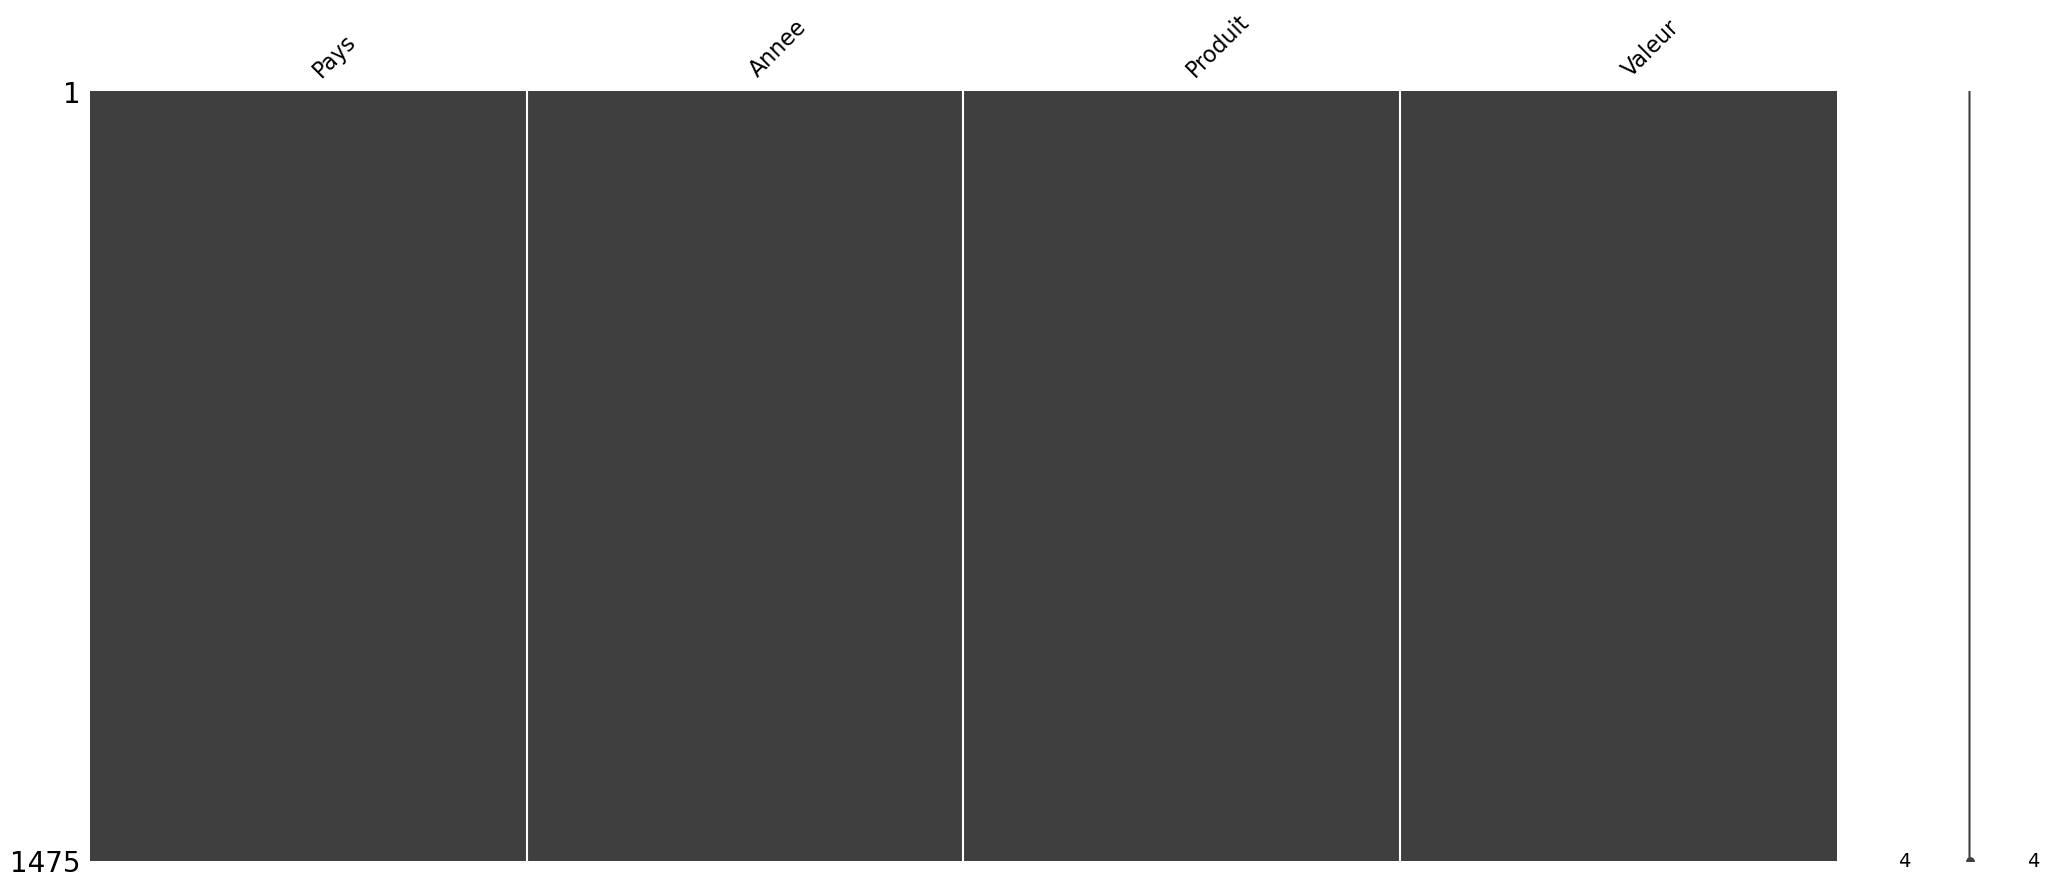

In [16]:
#Verification de l'exhaustivite des donnees - localisation des valeurs manquantes dans le fichier d'aide alimentaire
msno.matrix(aide_alim)

<AxesSubplot:>

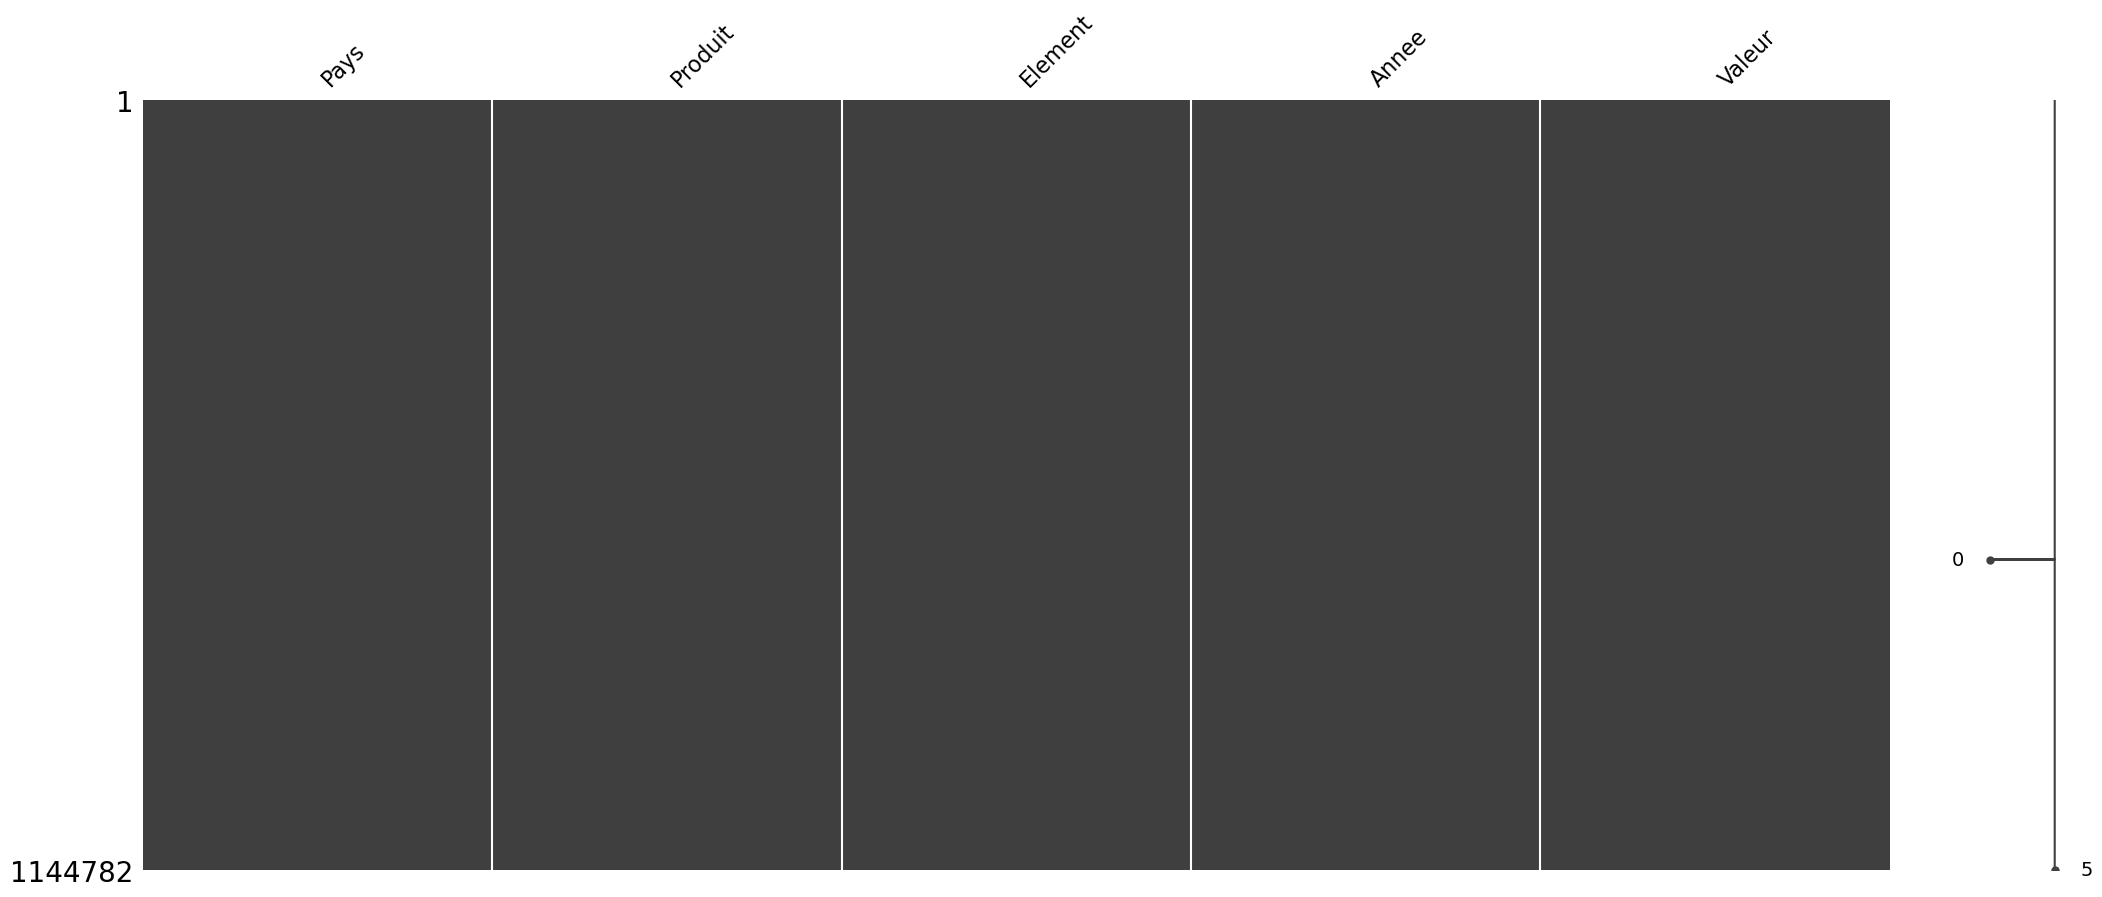

In [17]:
#Verification de l'exhaustivite des donnees - localisation des valeurs manquantes dans le fichier de disponibilite alimentaire
msno.matrix(dispo_alim)

In [18]:
#remplacer toutes les valeurs NULL par des zeros dans le fichier de disponibilite alimentaire
list = ["Pays", "Produit", "Element","Annee", "Valeur"]
for j in list:
    dispo_alim.loc[dispo_alim[j].isnull(), j] = 0    
    
#cela permet a present de recaster la variable Annee    
dispo_alim['Annee'] = dispo_alim['Annee'].astype('int')

<AxesSubplot:>

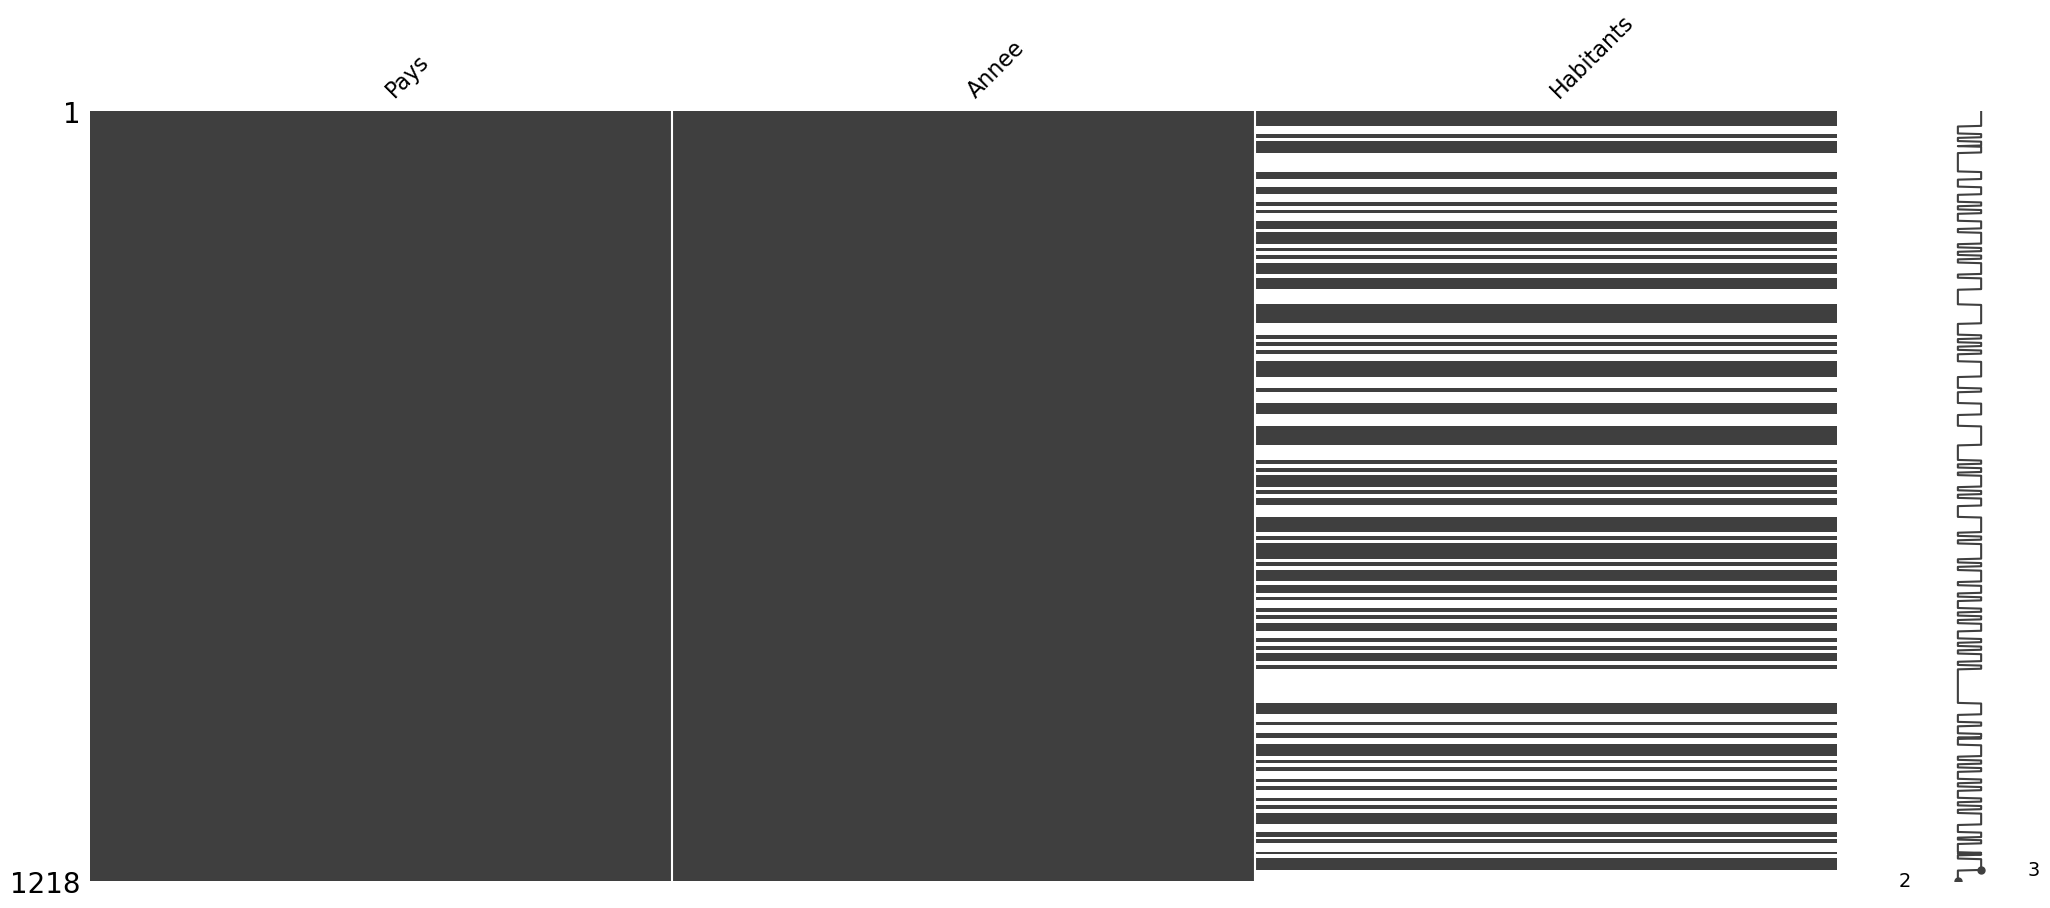

In [19]:
#Verification de l'exhaustivite des donnees - localisation des valeurs manquantes dans le fichier d'insecurite alimentaire
msno.matrix(sous_nut)

In [20]:
#Le fichier d'insecurite alimentaire comporte de nombreuses valeurs manquantes, il convient de les analyser plus en detail

In [21]:
#Nombre de pays dans le fichier d'insecurite alimentaire
print("Il y a",len(sous_nut['Pays'].unique()),'pays dans le fichier de sous-nutrition.')

Il y a 203 pays dans le fichier de sous-nutrition.


In [96]:
#lister les pays ou les valeurs manquent, sont completes et sont partiellement presentes
#dans le fichier d'insecurite alimentaire
sn_1 = sous_nut.loc[sous_nut['Habitants'].isnull(), ['Pays']]
sn_1_list = sn_1.groupby('Pays').size()
sn_2 = sous_nut.loc[sous_nut['Habitants'].notnull(), ['Pays']]
sn_2_list = sn_2.groupby('Pays').size()
print("Liste des pays avec des valeurs manquantes:\n",sn_1_list.index.values.tolist(),"\n")
print(len(sn_1_list),"pays sur", (len(sous_nut['Pays'].unique())) ,"ont des valeurs totalement manquantes.\n")
print("Liste des pays ayant des valeurs au moins partielles:\n",sn_2_list.index.values.tolist(),"\n")
print(len(sn_2_list),"pays sur", (len(sous_nut['Pays'].unique())) ,"ont des valeurs au moins partielles.\n")
print(len(sn_2_list)+len(sn_1_list)-(len(sous_nut['Pays'].unique())),"Pays sur",(len(sous_nut['Pays'].unique())),
      "ont des valeurs partielles.")

Liste des pays avec des valeurs manquantes:
 [] 

0 pays sur 203 ont des valeurs totalement manquantes.

Liste des pays ayant des valeurs au moins partielles:
 ['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne', 'Andorre', 'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine', 'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas', 'Bahreïn', 'Bangladesh', 'Barbade', 'Belgique', 'Belize', 'Bermudes', 'Bhoutan', 'Bolivie (État plurinational de)', 'Bosnie-Herzégovine', 'Botswana', 'Brunéi Darussalam', 'Brésil', 'Bulgarie', 'Burkina Faso', 'Burundi', 'Bélarus', 'Bénin', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Canada', 'Chili', 'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao', 'Chine, Taiwan Province de', 'Chine, continentale', 'Chypre', 'Colombie', 'Comores', 'Congo', 'Costa Rica', 'Croatie', 'Cuba', "Côte d'Ivoire", 'Danemark', 'Djibouti', 'Dominique', 'El Salvador', 'Espagne', 'Estonie', 'Eswatini', 'Fidji', 'Finlande', 'France', 'Fédération de Russie', 

#### La liste des pays pour lesquels aucune donnee de population en etat d'insecurite alimentaire n'est incluse dans le fichier comprend de nombreux pays developpes, comme notamment le Luxembourg, le Royaume-Uni ou Singapour. Il est probable que pour ces pays, le chiffre reel soit tres proche de zero. Les donnees sont manquantes egalement pour certains pays comme le Soudan du Sud, le Yemen ou l'Erythree, ou la situation geopolitique et climatique porte a penser que les donnees n'ont pas ete collectees et/ou fournies a la FAO par le pays en question. Il conviendra donc de faire preuve de prudence dans l'interpretation des donnees, celles-ci etant manifestement incompletes (en outre, l'absence de donnees historiques pour ces pays rend indisponible la methode de remplacement par la moyenne). 

In [23]:
#Inspection des donnees presentes dans les colonnes Annee et Habitants du fichier d'insecurite alimentaire
sous_nut.tail(60)

,Pays,Annee,Habitants
1158,Turquie,2012-2014,NaN
1159,Turquie,2013-2015,NaN
1160,Turquie,2014-2016,NaN
1161,Turquie,2015-2017,NaN
1162,Turquie,2016-2018,NaN
1163,Turquie,2017-2019,NaN
1164,Tuvalu,2012-2014,NaN
1165,Tuvalu,2013-2015,NaN
1166,Tuvalu,2014-2016,NaN
1167,Tuvalu,2015-2017,NaN


In [24]:
# Les annees sont exprimees en intervalles et la colonne Habitants contient des valeurs texte et des NaN
# qu'il faut egalement retraiter

#remplacer les intervalles par l'annee du milieu dans le fichier d'insecurite alimentaire
sous_nut.loc[sous_nut['Annee'] == '2012-2014', 'Annee'] = 2013
sous_nut.loc[sous_nut['Annee'] == '2013-2015', 'Annee'] = 2014
sous_nut.loc[sous_nut['Annee'] == '2014-2016', 'Annee'] = 2015
sous_nut.loc[sous_nut['Annee'] == '2015-2017', 'Annee'] = 2016
sous_nut.loc[sous_nut['Annee'] == '2016-2018', 'Annee'] = 2017
sous_nut.loc[sous_nut['Annee'] == '2017-2019', 'Annee'] = 2018

#remplacer les valeurs <0.1 par 0.05 dans le fichier d'insecurite alimentaire
sous_nut.loc[sous_nut['Habitants'] == '<0.1', 'Habitants'] = 0.05


#remplacer les valeurs manquantes par zero dans le fichier d'insecurite alimentaire
sous_nut.loc[sous_nut['Habitants'].isnull(), 'Habitants'] = 0

In [25]:
#cela permet de recaster les variables Annees et Habitants dans le fichier d'insecurite alimentaire
sous_nut['Annee'] = sous_nut['Annee'].astype('int')
sous_nut['Habitants'] = sous_nut['Habitants'].astype('float')

<AxesSubplot:>

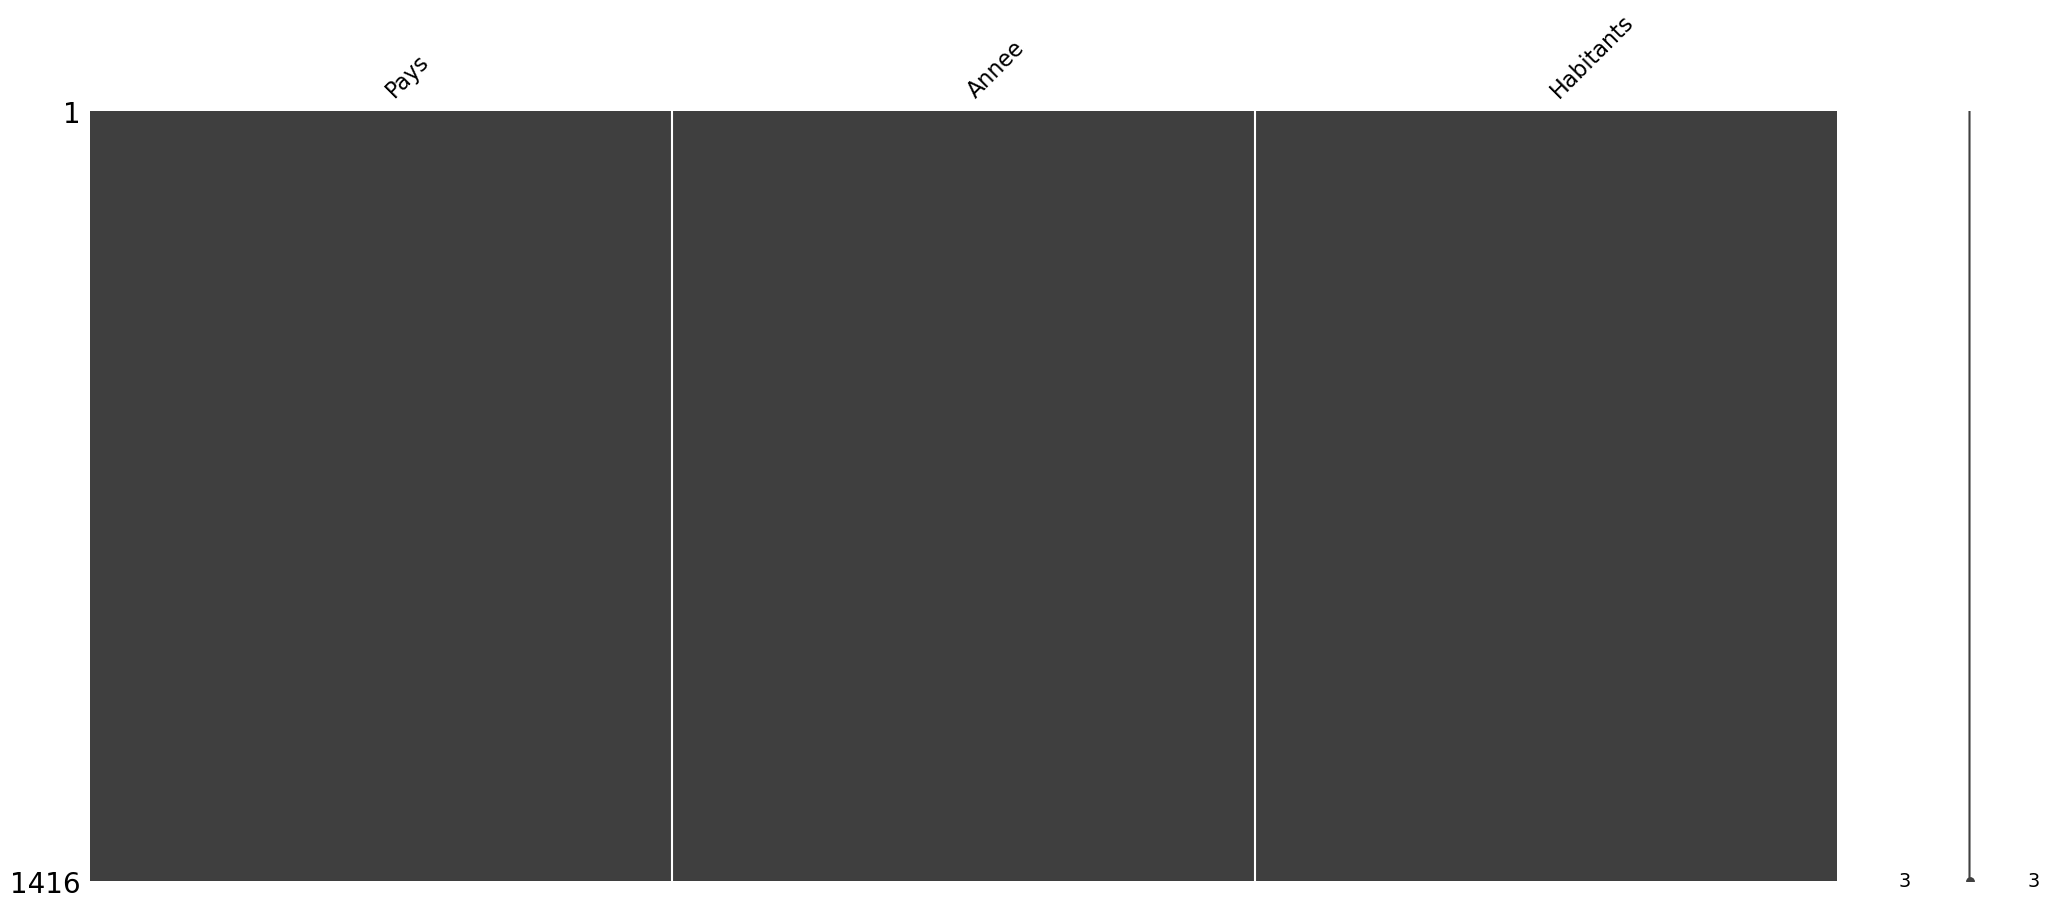

In [26]:
#Verification de l'exhaustivite des donnees - localisation des valeurs manquantes
msno.matrix(pop_tot)

In [27]:
# Verification de la coherence des donnees, data types et completude des tables modifiees
# pour chaque table de donnees importee avec la methode .describe()
# La ligne Count permet de deceler les valeurs manquantes, les valeurs numeriques renvoient des NaN pour les lignes unique, top,
# freq, et les valeurs string ou category renvoient des valeurs Nan pour les indicateurs statistiques dans les lignes suivantes
# (mean a max)

In [28]:
print("Table d'aide alimentaire\n", aide_alim.describe(include='all'),"\n")
print("Table de disponibilite alimentaire\n", dispo_alim.describe(include='all'),"\n")
print("Table de population totale\n", pop_tot.describe(include='all'),"\n")
print("Table de population en insecurite alimentaire\n", sous_nut.describe(include='all'),"\n")

Table d'aide alimentaire
            Pays        Annee       Produit         Valeur
count      1475  1475.000000          1475    1475.000000
unique       76          NaN            16            NaN
top     Algérie          NaN  Non-céréales            NaN
freq         39          NaN           220            NaN
mean        NaN  2014.054237           NaN    7481.966780
std         NaN     0.946916           NaN   23339.531424
min         NaN  2013.000000           NaN       0.000000
25%         NaN  2013.000000           NaN     287.500000
50%         NaN  2014.000000           NaN    1178.000000
75%         NaN  2015.000000           NaN    4334.500000
max         NaN  2016.000000           NaN  265013.000000 

Table de disponibilite alimentaire
              Pays           Produit                   Element         Annee  \
count     1144782           1144782                   1144782  1.144782e+06   
unique        186               100                        22           NaN   
top

## Etape 3 - Analyses statistiques, creation de nouveaux indicateurs, filtrage, jointures & visualisation

### Question 1 - proportion de personnes en etat de sous-nutrition

In [29]:
#Calcul du pourcentage mondial annuel de personnes en etat de sous-nutrition
pop_mdle = pop_tot.groupby('Annee')['Habitants'].sum().reset_index()
pop_mdle_sousnut = sous_nut.groupby('Annee')['Habitants'].sum().reset_index()
delta_sousnut = pd.merge(pop_mdle,pop_mdle_sousnut, on = 'Annee', how = 'left')
delta_sousnut.columns = ['Annee', 'Population totale en milliers','Population malnourrie en millions']
delta_sousnut['Malnutrition en %'] = ((delta_sousnut['Population malnourrie en millions'] * 1000000)
                                      / (delta_sousnut['Population totale en milliers'] * 1000))*100

In [30]:
sous_nut_2017 = delta_sousnut.loc[(delta_sousnut['Annee'] == 2017)]['Malnutrition en %']
print(round(sous_nut_2017.values[0],2),"% de la population mondiale etaient en etat de sous-nutrition en 2017.")

7.11 % de la population mondiale etaient en etat de sous-nutrition en 2017.


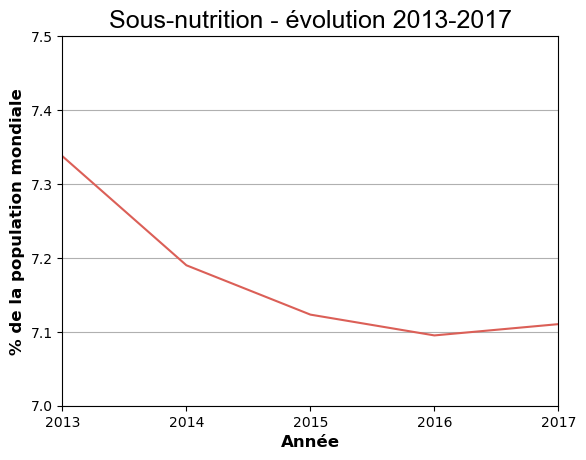

In [31]:
#representation graphique
graph1 = plt.plot(delta_sousnut['Annee'], delta_sousnut['Malnutrition en %'])
plt.title('Sous-nutrition - évolution 2013-2017', fontname = 'Arial',fontsize = 18)
plt.xlabel('Année',fontweight = 'bold' ,fontsize = 12)
plt.ylabel('% de la population mondiale',fontweight = 'bold',fontsize = 12)
plt.xlim(2013,2017)
plt.xticks([2013,2014,2015,2016,2017])
plt.ylim(7,7.5)
plt.yticks([7,7.1,7.2,7.3,7.4,7.5])
plt.grid(axis = 'y')
plt.savefig("graph1.png")

### Question 2 - Nb theorique de personnes qui pourraient etre nourries en 2017

In [32]:
#Calcul de la disponibilite alimentaire mondiale annuelle totale pour la periode 2013-2017
dispo_alim_mdle = dispo_alim.loc[(dispo_alim['Element'] == "Disponibilité alimentaire (Kcal)") & (dispo_alim['Annee'] >= 2013)
                                 &(dispo_alim['Annee'] <= 2017),:].reset_index()
DA_totale = dispo_alim_mdle.groupby('Annee')['Valeur'].sum().reset_index()
DA_totale = DA_totale.loc[(DA_totale != 0).any(axis=1)]
DA_totale.columns = ['Annee', 'Calories totales disponibles']
DA_totale['Population theorique en Miards'] = round((DA_totale['Calories totales disponibles']*1000000/(365*2500))/1000000000,2)

In [163]:
DA_totale_2017 = DA_totale.loc[(DA_totale['Annee'] == 2017)]['Population theorique en Miards']
print(round(DA_totale_2017.values[0],2),"milliards de personnes auraient pu theoriquement etre nourries en 2017.")
pop_tot_2017 = pop_tot.loc[(pop_tot['Annee'] == 2017)]['Habitants'].sum()
print("La population mondiale totale s'elevait a",round((pop_tot_2017/1000000),2),"milliards de personnes en 2017.")
sous_nut_2017 = sous_nut.loc[(sous_nut['Annee'] == 2017)]['Habitants'].sum()
print(sous_nut_2017,"millions de personnes etaient sous-alimentees en 2017",
      "soit une population effectivement nourrie inferieure de ",
    round((((DA_totale_2017.values[0]) - ((pop_tot_2017/1000000) - (sous_nut_2017/1000)))),2),
      "milliards a ce que les quantites disponibles auraient theoriquement pu permettre.")

8.84 milliards de personnes auraient pu theoriquement etre nourries en 2017.
La population mondiale totale s'elevait a 7.55 milliards de personnes en 2017.
536.7 millions de personnes etaient sous-alimentees en 2017 soit une population effectivement nourrie inferieure de  1.83 milliards a ce que les quantites disponibles auraient theoriquement pu permettre.


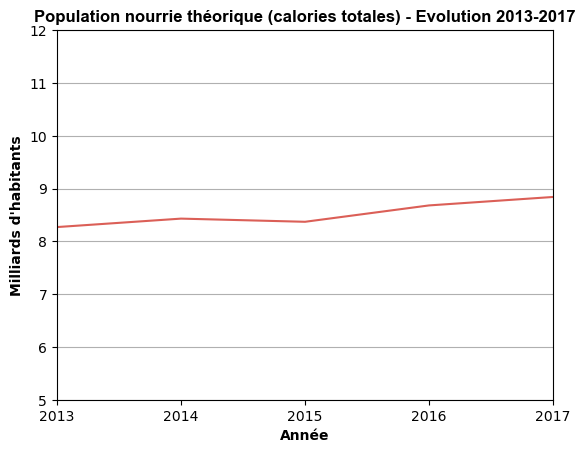

In [133]:
#Representation graphique
graph2 = plt.plot(DA_totale['Annee'], DA_totale['Population theorique en Miards'])
plt.title('Population nourrie théorique (calories totales) - Evolution 2013-2017', fontname = 'Arial',
          fontsize = 12,fontweight = 'bold')
plt.xlabel('Année',fontweight = 'bold' ,fontsize = 10)
plt.ylabel("Milliards d'habitants",fontweight = 'bold',fontsize = 10)
plt.xticks([2013,2014,2015,2016,2017])
plt.xlim(2013,2017)
plt.ylim(5,12)
plt.grid(axis = 'y')
plt.savefig("graph2.png")

### Question 3 - Disponibilite alimentaire des produits vegetaux en 2017

In [35]:
#Calcul de la disponibilite alimentaire mondiale annuelle totale des produits d'origine vegetale pour la periode 2013-2017
veggies_list = ["Blé et produits", "Riz et produits", "Orge et produits", "Maïs et produits", "Seigle et produits", "Avoine",
            "Millet et produits", "Sorgho et produits", "Céréales, Autres", "Manioc et produits", "Pommes de Terre et produits", 
            "Patates douces", "Sucre, canne", "Sucre, betterave", "Sucre non centrifugé", "Sucre Eq Brut", "Edulcorants Autres",
            "Haricots", "Pois", "Légumineuses Autres et produits", "Noix et produits", "Soja", "Arachides", 
            "Graines de tournesol","Graines Colza/Moutarde", "Graines de coton", "Coco (Incl Coprah)", "Sésame", "Palmistes",
            "Olives","Plantes Oleiferes, Autre","Huile de Soja", "Huile d'Arachide", "Huile de Tournesol",
            "Huile de Colza&Moutarde","Huile Graines de Coton","Huile de Palmistes", "Huile de Palme", "Huile de Coco",
            "Huile de Sésame", "Huile d'Olive","Huile de Son de Riz", "Huile de Germe de Maïs", "Huil Plantes Oleif Autr",
            "Tomates et produits", "Oignons","Légumes, autres", "Oranges, Mandarines","Citrons & Limes et produits",
            "Pamplemousse et produits","Agrumes, Autres", "Bananes", "Bananes plantains","Pommes et produits",
            "Ananas et produits", "Dattes", "Raisin","Fruits, autres", "Feve de Cacao et produits","Poivre",
            "Épices, Autres", "Ignames", "Racines nda", "Piments","Girofles", "Plantes Aquatiques"]

others_list = ["Café et produits", "Thé", "Vin", "Bière", "Boissons Fermentés", "Boissons Alcooliques"]

dispo_veg=dispo_alim[(dispo_alim.Produit.isin(veggies_list))|(dispo_alim.Produit.isin(others_list))]
dispo_veg_mdle = dispo_veg.loc[(dispo_veg['Element'] == "Disponibilité alimentaire (Kcal)")& (dispo_veg['Annee'] >= 2013)
                                 &(dispo_veg['Annee'] <= 2017),:].reset_index()
DV = dispo_veg_mdle.groupby('Annee')['Valeur'].sum().reset_index()
DV.columns = ['Annee', 'Calories totales disponibles']
DV['Population theorique en Miards'] = round((DV['Calories totales disponibles']*1000000/(365*2500))/1000000000,2)
DV['Type de calories'] = 'Végétales'




In [36]:
#Calcul de la disponibilite alimentaire mondiale annuelle totale des produits d'origine animale pour la periode 2013-2017
animals_list = ["Miel", "Viande de Bovins", "Viande d'Ovins/Caprins", "Viande de porcins", "Viande de Volailles",
                "Viande, Autre","Abats Comestible", "Beurre, Ghee", "Crème", "Graisses Animales Crue", "Oeufs",
                "Lait - Excl Beurre", "Poissons Eau Douce","Aliments pour enfants", "Miscellanees","Huiles de Poissons",
                "Huiles de Foie de Poisso", "Perciform", "Poissons Pelagiques","Poissons Marins, Autres", "Crustacés",
                "Cephalopodes", "Mollusques, Autres", "Animaux Aquatiques Autre","Viande de Anim Aquatiq"]


dispo_anim=dispo_alim[dispo_alim.Produit.isin(animals_list)]
dispo_anim_mdle = dispo_anim.loc[(dispo_anim['Element'] == "Disponibilité alimentaire (Kcal)")& (dispo_anim['Annee'] >= 2013)
                                 &(dispo_anim['Annee'] <= 2017),:].reset_index()
DAM = dispo_anim_mdle.groupby('Annee')['Valeur'].sum().reset_index()
DAM.columns = ['Annee', 'Calories totales disponibles']
DAM['Population theorique en Miards'] = round((DAM['Calories totales disponibles']*1000000/(365*2500))/1000000000,2)
DAM['Type de calories'] = 'Animales'
DV_and_DAM = pd.concat([DAM,DV], ignore_index = True)


In [169]:
DV_2017 = DV.loc[(DV['Annee'] == 2017)]['Population theorique en Miards'].values[0]
DAM_2017 = DAM.loc[(DAM['Annee'] == 2017)]['Population theorique en Miards'].values[0]
print("Sur les",round((DV_2017+DAM_2017),2),"milliards de personnes qui auraient pu etres nourries theoriquement en 2017,"
      ,DV_2017,"milliards auraient pu l'etre \n a partir de calories d'origine vegetale (soit",round(DV_2017/(pop_tot_2017/1000000)*100,2),"% de la population en 2017) contre",DAM_2017,
      "milliards seulement a partir de calories d'origine animale." )

Sur les 8.84 milliards de personnes qui auraient pu etres nourries theoriquement en 2017, 7.27 milliards auraient pu l'etre 
 a partir de calories d'origine vegetale (soit 96.32 % de la population en 2017) contre 1.57 milliards seulement a partir de calories d'origine animale.


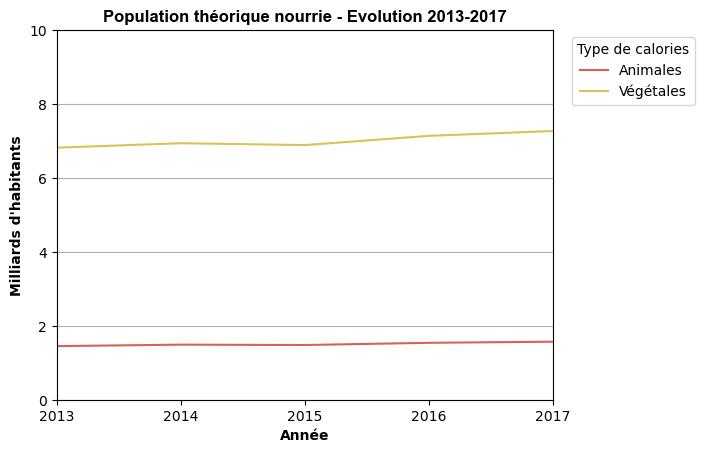

In [91]:
#Representation graphique
graph3 = sns.lineplot(x='Annee', y='Population theorique en Miards', hue='Type de calories', data=DV_and_DAM)
graph3.set_title("Population théorique nourrie - Evolution 2013-2017", fontname = 'Arial',fontsize = 12,fontweight = 'bold')
plt.xlabel('Année',fontweight = 'bold' ,fontsize = 10)
sns.move_legend(graph3, "upper right", bbox_to_anchor=(1.3, 1), title='Type de calories')
plt.ylabel("Milliards d'habitants",fontweight = 'bold',fontsize = 10)
plt.xticks([2013,2014,2015,2016,2017])
plt.xlim(2013,2017)
plt.ylim(0,10)
plt.grid(axis = 'y')
plt.savefig("graph3.png",bbox_inches='tight')
plt.show()


### Question 4 - utilisation de la disponibilite interieure
#### Le fichier de disponibilite alimentaire verifie les egalites suivantes pour chaque element de la colonne ['Produit']:
#### Disponibilité intérieure = Production + (Importations - Quantité) - (Exportations - Quantité) - Variation de stock
####                                         = Aliments pour animaux + Semences + Pertes + Traitement + Résidus + Nourriture

In [39]:
#Creation de la table d'emplois (Aliments pour animaux, Semences, Pertes, Traitement, Résidus et Nourriture)
#pour la periode 2013-2017



fourrage = dispo_alim.loc[(dispo_alim['Element'] == "Aliments pour animaux")& (dispo_alim['Produit'] != "Population")
                        &(dispo_alim['Annee']>=2013)&(dispo_alim['Annee']<=2017),:].reset_index()
semences = dispo_alim.loc[(dispo_alim['Element'] == "Semences")& (dispo_alim['Produit'] != "Population")
                        &(dispo_alim['Annee']>=2013)&(dispo_alim['Annee']<=2017),:].reset_index()
pertes = dispo_alim.loc[(dispo_alim['Element'] == "Pertes")& (dispo_alim['Produit'] != "Population")
                        &(dispo_alim['Annee']>=2013)&(dispo_alim['Annee']<=2017),:].reset_index()
traitements = dispo_alim.loc[(dispo_alim['Element'] == "Traitement")&(dispo_alim['Annee']>=2013)
                        &(dispo_alim['Annee']<=2017),:].reset_index()
residus = dispo_alim.loc[(dispo_alim['Element'] == "Résidus")&(dispo_alim['Produit'] != "Population")
                        &(dispo_alim['Annee']>=2013)&(dispo_alim['Annee']<=2017),:].reset_index()
nourriture = dispo_alim.loc[(dispo_alim['Element'] == "Nourriture")&(dispo_alim['Produit'] != "Population")
                        &(dispo_alim['Annee']>=2013)&(dispo_alim['Annee']<=2017),:].reset_index()


DI_usage =  pd.concat([fourrage, semences, pertes, traitements, residus, nourriture], ignore_index = True)


DI_usage_2 = DI_usage.groupby(['Annee','Element'])['Valeur'].sum().reset_index()
DI_usage_2_2017 = DI_usage_2.loc[(DI_usage_2['Annee']==2017)]


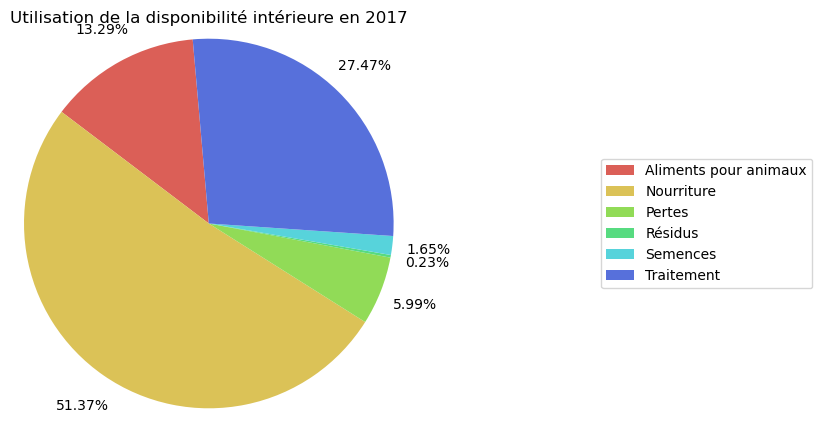

In [94]:
fig, ax = plt.subplots(figsize=(5,5))
graph4 = plt.pie(DI_usage_2_2017["Valeur"],autopct='%1.2f%%',pctdistance=1.2,radius=1.2,startangle=95)
#ax.legend(DI_usage_2_2017["Element"],title="",loc="center left",bbox_to_anchor=(0, 0.5, 0, 0))
ax.legend(DI_usage_2_2017["Element"],title="",loc="center left",bbox_to_anchor=(1.5, 0, 0.5, 1))
ax.set_title("Utilisation de la disponibilité intérieure en 2017", loc="center")
plt.savefig("graph4a.png",bbox_inches='tight')
plt.show()


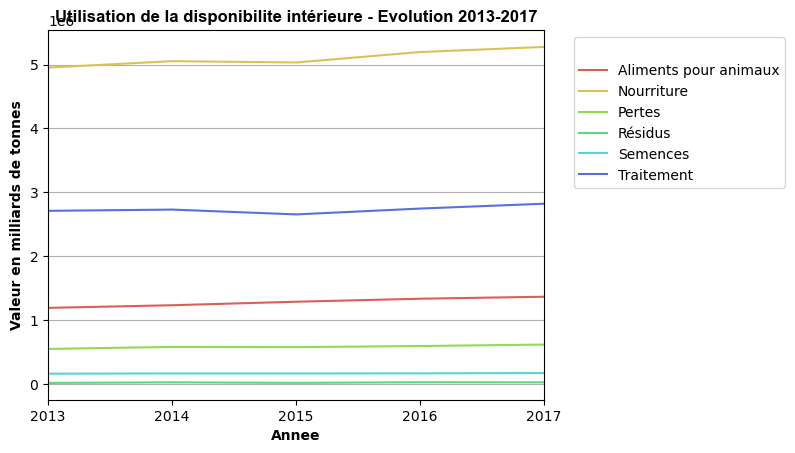

In [93]:
#Representation graphique
graph4b = sns.lineplot(x='Annee', y='Valeur', hue='Element', data=DI_usage_2)
graph4b.set_title("Utilisation de la disponibilite intérieure - Evolution 2013-2017", fontname = 'Arial',fontsize = 12,
                  fontweight = 'bold')
plt.xlabel('Annee',fontweight = 'bold' ,fontsize = 10)
plt.ylabel("Valeur en milliards de tonnes",fontweight = 'bold',fontsize = 10)
plt.xticks([2013,2014,2015,2016,2017])
plt.xlim(2013,2017)
plt.grid(axis = 'y')
#sns.move_legend(graph4b, "upper right", bbox_to_anchor=(0.5, 0.90), title=' ')
sns.move_legend(graph4b, "upper right", bbox_to_anchor=(1.5, 1), title=' ')
plt.savefig("graph4b.png",bbox_inches='tight')
plt.show()


### Question 5 - Pays pour lesquels la proportion de personnes sous-alimentees est la plus forte en 2017

In [105]:
#Filtrage des donnees de sous-alimentation et de population pour l'annee 2017
sous_nut_2017 = sous_nut.loc[sous_nut['Annee'] == 2017]
sous_nut_2017 = sous_nut_2017[sous_nut_2017['Habitants'] != 0]
pop_tot_2017 = pop_tot.loc[pop_tot['Annee'] == 2017]

#Do a right join as there are more countries wityh population info in pop_tot than countries with sous-nutrition
#info in sous_nut
#=> helps avoids NaNs in final result
rang_sousnut = pd.merge(pop_tot_2017, sous_nut_2017, how = 'right', left_on = ['Pays','Annee'], right_on = ['Pays','Annee'])
rang_sousnut.columns = ['Pays', 'Annee','Population totale en milliers','Population malnourrie en millions']
rang_sousnut["% malnutrition"] = round(((rang_sousnut['Population malnourrie en millions'] * 1000000)/
                                  (rang_sousnut['Population totale en milliers'] * 1000))*100 ,2)

rang_sousnut.sort_values("% malnutrition", inplace = True, ascending = False)
x = 10
print(rang_sousnut.head(x).to_csv("tableau5a.csv",index=False))
print("Les",x,"pays pour lesquels la proportion de personnes sous-alimentees etait la plus forte en 2017 etaient:\n")
rang_sousnut.head(x)


None
Les 10 pays pour lesquels la proportion de personnes sous-alimentees etait la plus forte en 2017 etaient:



,Pays,Annee,Population totale en milliers,Population malnourrie en millions,% malnutrition
27,Dominique,2017,71.458,0.05,69.97
41,Haïti,2017,10982.366,5.30,48.26
82,République populaire démocratique de Corée,2017,25429.825,12.00,47.19
85,Saint-Vincent-et-les Grenadines,2017,109.827,0.05,45.53
52,Kiribati,2017,114.158,0.05,43.80
57,Madagascar,2017,25570.512,10.50,41.06
55,Libéria,2017,4702.226,1.80,38.28
53,Lesotho,2017,2091.534,0.80,38.25
94,Tchad,2017,15016.753,5.70,37.96
84,Rwanda,2017,11980.961,4.20,35.06


In [106]:
#Si on ignore les pays a faible prevalence de sous-nutrition indiques comme '<0.1' dans le fichier d'origine
sous_nut_2017_trim = sous_nut_2017[(sous_nut_2017['Habitants'] != 0) & (sous_nut_2017['Habitants'] != 0.05)]

In [108]:
#Do a right join as there are more countries wityh population info in pop_tot than countries with sous-nutrition info
#in sous_nut
#=> helps avoids NaNs in final result
rang_sousnut_trim = pd.merge(pop_tot_2017, sous_nut_2017_trim, how = 'right', left_on = ['Pays','Annee'], right_on = ['Pays',
                                                                                                                      'Annee'])
rang_sousnut_trim.columns = ['Pays', 'Annee','Population totale en milliers','Population malnourrie en millions']
rang_sousnut_trim["% malnutrition"] = round(((rang_sousnut_trim['Population malnourrie en millions'] * 1000000)/
                                  (rang_sousnut_trim['Population totale en milliers'] * 1000))*100 ,2)

rang_sousnut_trim.sort_values("% malnutrition", inplace = True, ascending = False)
y = 10
print(rang_sousnut_trim.head(y).to_csv("tableau5b.csv",index=False))
print("En ignorant les ajustements manuels faits au fichier d'origine, les",y,
      "pays pour lesquels la proportion de personnes \n sous-alimentees etait la plus forte en 2017 etaient:\n")
rang_sousnut_trim.head(y)

None
En ignorant les ajustements manuels faits au fichier d'origine, les 10 pays pour lesquels la proportion de personnes 
 sous-alimentees etait la plus forte en 2017 etaient:



,Pays,Annee,Population totale en milliers,Population malnourrie en millions,% malnutrition
32,Haïti,2017,10982.366,5.3,48.26
67,République populaire démocratique de Corée,2017,25429.825,12.0,47.19
45,Madagascar,2017,25570.512,10.5,41.06
44,Libéria,2017,4702.226,1.8,38.28
42,Lesotho,2017,2091.534,0.8,38.25
76,Tchad,2017,15016.753,5.7,37.96
69,Rwanda,2017,11980.961,4.2,35.06
53,Mozambique,2017,28649.018,9.4,32.81
78,Timor-Leste,2017,1243.258,0.4,32.17
0,Afghanistan,2017,36296.113,10.5,28.93


### ce qui nous permet de noter que les ajustements manuels en question ont resulte en une sur-estimation de la sous-alimentation pour les petits etats insulaires a faible population (St Vincent et les Grenadines, Kiribati et la Dominique)

### Question 6 - Pays ayant le plus beneficie d'aide alimentaire entre 2013 et 2016
#### La FAO ne publie plus les donnees des Food Aid Shipments (World Food Program) apres 2016 - cf. https://www.fao.org/faostat/en/#data/FA

In [109]:
# Filtrage des donnees d'aide alimentaire sur la periode 2013-2016. Le fichier comporte des sous-totaux en ligne,
# donc on ne gardera que les valeurs 'Céréales' et 'Non-céréales' pour ne pas artificiellement dupliquer les montants
# d'aide recue
aide_alim_1316 = aide_alim.loc[(aide_alim['Annee'] >= 2013) & (aide_alim['Annee'] <= 2016) & 
                               ((aide_alim['Produit'] == 'Céréales')|(aide_alim['Produit'] == 'Non-céréales'))]
aide_alim_1316 = aide_alim_1316.groupby('Pays')['Valeur'].sum().reset_index()
aide_alim_1316.sort_values('Valeur',inplace = True, ascending = False)
z = 10
print(aide_alim_1316.head(z).to_csv("tableau6a.csv",index=False))
print ("Les",z,"pays ayant recu le plus d'aide alimentaire totale (en tonnes) entre 2013 et 2016 sont: ")
aide_alim_1316.head(z)

None
Les 10 pays ayant recu le plus d'aide alimentaire totale (en tonnes) entre 2013 et 2016 sont: 


,Pays,Valeur
50,République arabe syrienne,929918.0
75,Éthiopie,690647.0
70,Yémen,603242.0
61,Soudan du Sud,347624.0
60,Soudan,334892.0
30,Kenya,276418.0
3,Bangladesh,174094.0
59,Somalie,146339.0
53,République démocratique du Congo,144251.0
43,Niger,138172.0


In [115]:
#Filtrage des donnees moyennes de population sur la periode 2013-2016
pop_moy_1316 = pop_tot.loc[(pop_tot['Annee'] >= 2013) & (pop_tot['Annee'] <=2016)]
pop_moy_1316 = round(pop_moy_1316.groupby('Pays')['Habitants'].mean().reset_index(),0)
pop_moy_1316.rename(columns={'Habitants': 'Habitants (x 1,000)'}, inplace=True)

#Jointure avec les donnees d'aide alimentaire en divisant par 4
#Si on utilise la fonction .mean, on obtient un classement different car certains pays n'on pas recu d'aide sur les 4 annees
# donc cela augmente artificiellement leur moyenne annuelle
aide_alim_1316_percap = pd.merge(aide_alim_1316,pop_moy_1316, how = 'left', on = 'Pays')
aide_alim_1316_percap.rename(columns={'Valeur': 'Valeur moyenne annuelle sur 4 ans (en tonnes)'}, inplace=True)
aide_alim_1316_percap['Valeur moyenne annuelle sur 4 ans (en tonnes)'] = ((
    aide_alim_1316_percap["Valeur moyenne annuelle sur 4 ans (en tonnes)"])/4)
aide_alim_1316_percap["kg / hab / an"] = (aide_alim_1316_percap['Valeur moyenne annuelle sur 4 ans (en tonnes)'])/(
    (aide_alim_1316_percap["Habitants (x 1,000)"]))


aide_alim_1316_percap.sort_values("kg / hab / an",inplace = True, ascending = False)
t = 10
print(aide_alim_1316_percap[['Pays','kg / hab / an']].head(t).to_csv("tableau6b.csv",index=False))
print ("Les",t,"pays ayant recu le plus d'aide alimentaire par an per capita entre 2013 et 2016 sont: ")
aide_alim_1316_percap[['Pays','kg / hab / an']].head(t)

None
Les 10 pays ayant recu le plus d'aide alimentaire par an per capita entre 2013 et 2016 sont: 


,Pays,kg / hab / an
0,République arabe syrienne,12.608716
3,Soudan du Sud,8.187094
2,Yémen,5.765148
37,Djibouti,5.697572
16,Palestine,4.732374
7,Somalie,2.686499
10,Tchad,2.411675
19,Nicaragua,2.331635
4,Soudan,2.177451
43,Guinée-Bissau,1.871283


### Question 7a - pays ayant le plus de disponibilite par habitant

In [116]:
dispo_alim_2017_kcal = dispo_alim.loc[(dispo_alim['Annee'] == 2017)&(dispo_alim['Element'] ==
                                                                     'Disponibilité alimentaire (Kcal/personne/jour)')]         
dispo_alim_2017_kcal = dispo_alim_2017_kcal.groupby('Pays')['Valeur'].sum().reset_index()
dispo_alim_2017_kcal = dispo_alim_2017_kcal.loc[(dispo_alim_2017_kcal != 0).any(axis=1)]
dispo_alim_2017_kcal.sort_values("Valeur",inplace = True, ascending = False)
v = 10
print(dispo_alim_1317_kcal.tail(v).to_csv("tableau7a-1.csv",index=False))
print ("Les", v, "pays ayant le plus de disponibilite alimentaire en kcal/pers/jour en 2017 sont: ")
dispo_alim_2017_kcal.head(v)

None
Les 10 pays ayant le plus de disponibilite alimentaire en kcal/pers/jour en 2017 sont: 


,Pays,Valeur
72,Irlande,3834.0
176,États-Unis d'Amérique,3774.0
16,Belgique,3771.0
164,Turquie,3734.0
11,Autriche,3685.0
73,Islande,3651.0
74,Israël,3562.0
127,Roumanie,3552.0
4,Allemagne,3545.0
53,France,3509.0


In [56]:
dispo_alim_1317_kcal = dispo_alim.loc[(dispo_alim['Annee'] >= 2013) & (dispo_alim['Annee'] <= 2017) 
                                 & (dispo_alim['Element'] == 'Disponibilité alimentaire (Kcal/personne/jour)')]
dispo_alim_1317_kcal = dispo_alim_1317_kcal.groupby(['Pays', 'Annee'])['Valeur'].sum().reset_index()

dispo_alim_1317_kcal = dispo_alim_1317_kcal.groupby(['Pays'])['Valeur'].mean().reset_index()
dispo_alim_1317_kcal.sort_values('Valeur',inplace = True, ascending = False)
print(dispo_alim_1317_kcal.tail(v).to_csv("tableau7a-2.csv",index=False))
print ("Les",v,"pays ayant la disponibilite en kcal/pers/jour moyenne la plus elevee sur la periode 2013-2017 sont: ")
dispo_alim_1317_kcal.head(v)


None
Les 10 pays ayant la disponibilite en kcal/pers/jour moyenne la plus elevee sur la periode 2013-2017 sont: 


,Pays,Valeur
16,Belgique,3773.6
176,États-Unis d'Amérique,3732.0
72,Irlande,3711.2
164,Turquie,3697.4
11,Autriche,3677.0
4,Allemagne,3542.4
74,Israël,3541.6
73,Islande,3529.2
75,Italie,3499.8
90,Luxembourg,3486.2


### Question 7b - pays ayant le moins de disponibilite par habitant

In [57]:
print(dispo_alim_1317_kcal.tail(v).to_csv("tableau7b-1.csv",index=False))
print ("Les", v, "pays ayant le moins de disponibilite alimentaire en kcal/pers/jour en 2017 sont: ")
dispo_alim_2017_kcal.tail(v)

None
Les 10 pays ayant le moins de disponibilite alimentaire en kcal/pers/jour en 2017 sont: 


,Pays,Valeur
65,Haïti,2145.0
80,Kenya,2144.0
137,République populaire démocratique de Corée,2090.0
172,Zimbabwe,2045.0
115,Ouganda,2030.0
170,Yémen,1991.0
104,Mozambique,1928.0
92,Madagascar,1915.0
131,République centrafricaine,1903.0
24,Burundi,1740.0


In [58]:
print(dispo_alim_1317_kcal.tail(v).to_csv("tableau7b-2.csv",index=False))
print ("Les",v,"pays ayant la disponibilite en kcal/pers/jour moyenne la plus faible sur la periode 2013-2017 sont:")
dispo_alim_1317_kcal.tail(v)

None
Les 10 pays ayant la disponibilite en kcal/pers/jour moyenne la plus faible sur la periode 2013-2017 sont:


,Pays,Valeur
135,République démocratique du Congo,2140.60
172,Zimbabwe,2137.50
171,Zambie,2135.75
115,Ouganda,2133.40
137,République populaire démocratique de Corée,2102.60
170,Yémen,2085.00
104,Mozambique,1963.20
92,Madagascar,1944.20
131,République centrafricaine,1877.00
24,Burundi,1716.50


### Question 8 - Utilisation des cereales

In [59]:
# Liste des cereales d'apres le classement des bilans alimentaires de la FAO https://www.fao.org/faostat/fr/#data/FBS
cereal_list = ["Blé et produits", "Riz et produits", "Orge et produits", "Maïs et produits", "Seigle et produits", "Avoine",
            "Millet et produits", "Sorgho et produits", "Céréales, Autres"]

# Filtrage des donnees pour l'annee 2017
dispo_cereal = dispo_alim[dispo_alim.Produit.isin(cereal_list)]
dispo_cereal_2017_trim = dispo_cereal.loc[(dispo_cereal['Annee']==2017)&((dispo_cereal['Element']=='Disponibilité intérieure')|
                                          (dispo_cereal['Element']=='Aliments pour animaux')|
                                         ((dispo_cereal['Element']=='Nourriture'))),:]

dispo_cereal_2017_trim_GR = dispo_cereal_2017_trim.groupby(['Produit','Element'])['Valeur'].sum().reset_index()

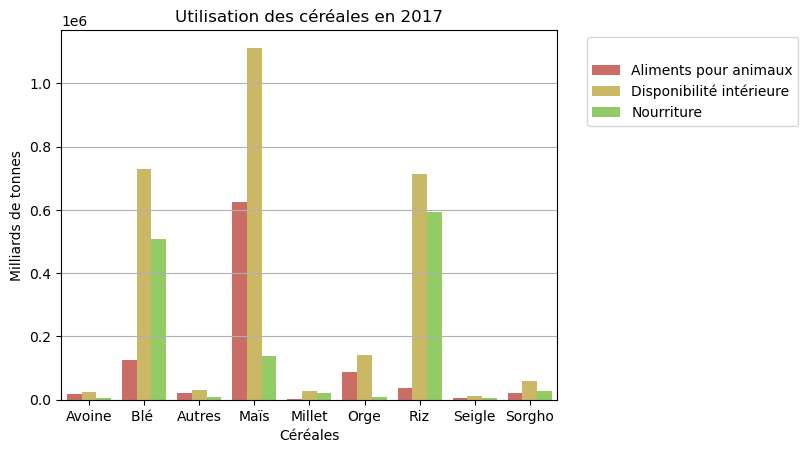

In [95]:
graph8 = sns.barplot(x='Produit', y='Valeur', hue='Element', data=dispo_cereal_2017_trim_GR)
graph8.set_xlabel("Céréales")
graph8.set_ylabel("Milliards de tonnes")
graph8.set_xticklabels(['Avoine', 'Blé ', 'Autres', 'Maïs','Millet', 'Orge','Riz','Seigle', 'Sorgho'])
graph8.set_title("Utilisation des céréales en 2017") 
#sns.move_legend(graph8, "upper right", bbox_to_anchor=(0.95, 0.95), title=' ')
sns.move_legend(graph8, "upper right", bbox_to_anchor=(1.5, 1), title=' ')
plt.grid(axis = 'y')
plt.savefig("graph8.png",bbox_inches='tight')
plt.show()


In [117]:
# Liste des viandes d'apres le classement des bilans alimentaires de la FAO https://www.fao.org/faostat/fr/#data/FBS
meat_list = ["Viande de Bovins", "Viande d'Ovins/Caprins", "Viande de porcins", "Viande de Volailles", "Abats Comestible"]

# Filtrage des donnees pour calculer la production mondiale de viande en 2017
dispo_meat = dispo_alim[dispo_alim.Produit.isin(meat_list)]
dispo_meat_mdle_2017 = dispo_meat.loc[(dispo_meat['Element'] == 'Production')
                                    &(dispo_meat['Annee'] == 2017)]    
dispo_meat_mdle_2017 = dispo_meat_mdle_2017.groupby('Produit')['Valeur'].sum().reset_index()

#Creation d'une fonction pour afficher certains resultats en notation scientifique pour en simplifier la lecture
def sci_not(a):
    return("{:.2e}".format(a))

#Comparaison avec les cereales utilisees pour cette production
mais_dispo = dispo_cereal_2017_trim_GR.loc[
                                           (dispo_cereal_2017_trim_GR['Element']=='Aliments pour animaux')]['Valeur'].sum()
print("Quantite totale de cereales utilisees dans l'alimentation animale en 2017 : ",sci_not(mais_dispo * 1000),"tonnes\n")
print("Equivalent calorique sur la base de 2,950kCal / kg de cereales en moyenne  (source:Feedtables.com, 2023) : \n",
      sci_not(mais_dispo*1000*1000*2950),"kCal totales\n")
print("Equivalent calorique de la viande produite en 2017 (sur la base de 2,300kCal / kg de viande en moyenne (source:FDA, 2021):\n",
      sci_not(dispo_meat_mdle_2017['Valeur'].sum()*1000000*2300),"kCal totales \n")
print("Soit ",round((mais_dispo*1000*1000*2950)/((dispo_meat_mdle_2017['Valeur'].sum())*1000000*2300),2),
      " calories de cereales consommees pour chaque calorie de viande produite en 2017.\n")
print("On aurait pu nourrir",round((mais_dispo*1000*1000*2950/2500/365/1000000000),2),
      "milliards de personnes en 2017 avec la meme quantite de cereales, alors que seules"
      ,round((dispo_meat_mdle_2017['Valeur'].sum()*1000000*2300/2500/365/1000000000),2),
      "milliards ont effectivement ete nourries a partir des calories animales produites.")


Quantite totale de cereales utilisees dans l'alimentation animale en 2017 :  9.40e+08 tonnes

Equivalent calorique sur la base de 2,950kCal / kg de cereales en moyenne  (source:Feedtables.com, 2023) : 
 2.77e+15 kCal totales

Equivalent calorique de la viande produite en 2017 (sur la base de 2,300kCal / kg de viande en moyenne (source:FDA, 2021):
 8.05e+14 kCal totales 

Soit  3.44  calories de cereales consommees pour chaque calorie de viande produite en 2017.

On aurait pu nourrir 3.04 milliards de personnes en 2017 avec la meme quantite de cereales, alors que seules 0.88 milliards ont effectivement ete nourries a partir des calories animales produites.


#### comparer ce chiffre a la proportion de personnes nourrissable en vegetal vs animal - rapport de 1 a 4 environ, 1 a 3.5 ici => souligne une fois de plus l'inefficience de l'elevage
#### En pratique, les valeurs sont de 9/7/4 pour boeuf,porc,volaille en moyenne

### Question 9 - Utilisation du manioc en Thailande

In [121]:
#Filtagr des donnees de malnutrition pour la Thailande
sous_nut_thai = sous_nut.loc[(sous_nut['Pays']=='Thaïlande'),:]
sous_nut_thai_pct = pd.merge(pop_tot, sous_nut_thai, how = 'right', left_on = ['Pays','Annee'], right_on = ['Pays','Annee'])
sous_nut_thai_pct.columns = ['Pays', 'Annee','Population totale en milliers','Population malnourrie en millions']
sous_nut_thai_pct["% malnutrition"] = round(((sous_nut_thai_pct['Population malnourrie en millions'] * 1000000)/
                                  (sous_nut_thai_pct['Population totale en milliers'] * 1000))*100 ,2)

#Filtrage des donnees de population pour la Thailande
thai_pop_2017 = pop_tot.loc[(pop_tot['Annee'] == 2017)&(pop_tot['Pays'] == 'Thaïlande'),['Habitants']]
thai_sous_nut_2017 = sous_nut.loc[(sous_nut['Annee'] == 2017)&(sous_nut['Pays'] == 'Thaïlande'),['Habitants']]
thai_pop_moy_1318 = sous_nut_thai_pct.groupby(['Pays'])['Population totale en milliers'].mean().reset_index()
thai_pop_moy_1318 = thai_pop_moy_1318.loc[(thai_pop_moy_1318['Pays']=='Thaïlande')]['Population totale en milliers']
thai_pop_moy_1318 = thai_pop_moy_1318.values[0]

#Filtrage des donnees sur le manioc pour la Thailande
dispo_alim_thai_manioc = dispo_alim.loc[(dispo_alim['Pays'] == 'Thaïlande')&(dispo_alim['Produit'] == 'Manioc et produits')]
manioc_avg = dispo_alim_thai_manioc.groupby(['Element'])['Valeur'].mean().reset_index()
manioc_exp = manioc_avg.loc[(manioc_avg['Element']=='Exportations - Quantité')]['Valeur'].sum()
manioc_prod = manioc_avg.loc[(manioc_avg['Element']=='Production')]['Valeur'].sum()

#Creation de nouveaux indicateurs pour simplifier les formules
thai_pct = ((thai_sous_nut_2017.values[0]*1000000)/(thai_pop_2017.values[0]*1000))*100
thai_fact = ((manioc_prod* 1000*1000*1600)/(365*2500))/(thai_sous_nut_2017.values[0]*1000000)
manioc_feedpop = round((manioc_prod* 1000*1000*1600)/(365*2500)/1000000,2)
#manioc cuit 1600 kcal / kg (Source: FDA, 2021)
#besoins energetiques journaliers moyens 2,500 kcal / pers (Source: FAO, 2021)


print("La Thailande produisait en moyenne",round((manioc_prod/1000),2),
      "millions de tonnes de manioc par an sur la periode 2013-2018 soit \n",
      sci_not(manioc_prod* 1000*1000*1600),"kCal par an en moyenne,",
     "soit les calories necessaires pour nourrir", manioc_feedpop, "millions de personnes par an en \n moyenne, soit",
     round( ((manioc_feedpop)/(thai_pop_moy_1318/1000))*100,2),"% de sa population moyenne sur la periode, mais en pratique",
      round((manioc_exp /manioc_prod )*100,2),"% de la production en moyenne sont \n exportes et le taux de malnutrition",
      "s'elevait a",round(thai_pct[0],2),"% en 2017.")
print("Cette quantite de manioc serait suffisante a couvrir les besoins caloriques d'environ ",round(thai_fact[0],2),
      "fois la population malnourrie \n en Thailande. On note egalement que la Thailande importe du manioc malgre",
      "sa production importante.")
  


La Thailande produisait en moyenne 30.85 millions de tonnes de manioc par an sur la periode 2013-2018 soit 
 4.94e+13 kCal par an en moyenne, soit les calories necessaires pour nourrir 54.1 millions de personnes par an en 
 moyenne, soit 78.61 % de sa population moyenne sur la periode, mais en pratique 91.86 % de la production en moyenne sont 
 exportes et le taux de malnutrition s'elevait a 8.96 % en 2017.
Cette quantite de manioc serait suffisante a couvrir les besoins caloriques d'environ  8.73 fois la population malnourrie 
 en Thailande. On note egalement que la Thailande importe du manioc malgre sa production importante.


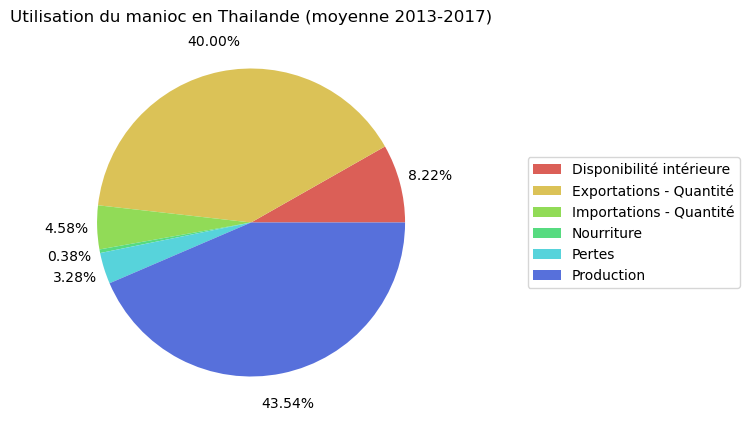

In [89]:
#Representation graphique de l'utilisation du manioc en Thailande
manioc_GR = manioc_avg.iloc[9:15]
fig, ax = plt.subplots(figsize=(5,5))
graph9 = plt.pie(manioc_GR["Valeur"],autopct='%1.2f%%',pctdistance=1.2,radius=1)
#ax.legend(manioc_GR["Element"], title="", loc="center left", bbox_to_anchor=(0.25, 0.5, 0.75, 0))
ax.legend(manioc_GR["Element"], title="", loc="center left", bbox_to_anchor=(1.2, 0, 0.5, 1))
ax.set_title("Utilisation du manioc en Thailande (moyenne 2013-2017)", loc="center")
plt.savefig("graph9.png",bbox_inches='tight')
plt.show()


#### Disponibilité intérieure = Production + (Importations - Quantité) - (Exportations - Quantité) - Variation de stock